In [ ]:
#Trying to implemenet a basic version of segmentation and denoising over here

So over here basic pipeline we have is
1. Load the pictures from the desired dataset two diff photos 

2. One if we're starting with psnr we basically need to load the photo into with image_true and image_test(the noised image) (If i have photos how do we decide which is which can prolly reverse and see)
* Basically need to plot a graph of psnr vs noise when we're increasing the amount of noise percentage wise in the pixels 

3. If we're doing SSIM we'll compare two photos in the following order as Bhavesh had requested and deal with them accordingly 
* Dog and cat
* Cat and cat (diff breed)
* Dog and Dog (diff breed)
*Dog and Dog (same breed but diff angle/lighting)
* Cat and Cat (same breed but diff angle/lighting)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.transform import resize
from skimage.filters import gaussian
import matplotlib.pyplot as plt
import torch
from torch import nn
from tqdm import tqdm
import math


In [ ]:
# Path to the text file containing the image file names
text_file_path = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt"

# Initialize empty sets to store unique cat and dog file names
unique_cats = set()
unique_dogs = set()

# Read the text file line by line
with open(text_file_path, "r") as file:
    for line in file:
        # Split the line by spaces
        parts = line.split()
        if len(parts) > 0:
            # Extract the image file name (assuming it's the first part)
            filename = parts[0]
            # Remove any numbering before the first underscore
            name_without_numbering = filename.split("_", 1)[0]
            # Check if the filename starts with a capital letter (cat) or a lowercase letter (dog)
            if name_without_numbering[0].isupper():
                unique_cats.add(name_without_numbering)
            else:
                unique_dogs.add(name_without_numbering)

# Convert the sets to lists and print the unique cat and dog file names
unique_cats_list = list(unique_cats)
unique_dogs_list = list(unique_dogs)

print("Unique cat names list:")
print(unique_cats_list)

print("\nUnique dog names list:")
print(unique_dogs_list)


In [ ]:
import matplotlib.pyplot as plt
from skimage import img_as_float 

cat_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_1.jpg'))
dog_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_1.jpg'))
cat_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_2.jpg'))
dog_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_2.jpg'))
cat_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Persian_1.jpg'))
dog_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/pug_1.jpg'))



black_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/black_pic.png'))
white_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/white_pic.jpeg'))
same_dog_a = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_a.png'))
same_dog_b = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_b.png'))
same_dog_c = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_c.png'))
same_dog_d = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_d.png'))



# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cat_pic_1)
plt.title('Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(dog_pic_1)
plt.title('Dog Image')

plt.show()





In [ ]:


# Function to resize and convert an image to grayscale
def preprocess_image(image, target_shape):
    gray_image = rgb2gray(image)
    resized_image = resize(gray_image, target_shape, anti_aliasing=True)
    return resized_image

# Function to compare two images using SSIM
def compare_images(image1, image2, target_shape):
    image1_preprocessed = preprocess_image(image1, target_shape)
    image2_preprocessed = preprocess_image(image2, target_shape)
    ssim_value = ssim(image1_preprocessed, image2_preprocessed, data_range=image1_preprocessed.max() - image1_preprocessed.min())
    return ssim_value

# Sample usage
if __name__ == "__main__":
    # Load your images here (for example, using plt.imread)
    cat_pic_1 = cat_pic_1
    dog_pic_1 = dog_pic_1

    target_shape = (100, 100)
    ssim_value = compare_images(cat_pic_1, dog_pic_1, target_shape)
    ssim_value2 = compare_images(cat_pic_1,black_pic, target_shape)
    ssim_value3 = compare_images(cat_pic_1,white_pic,target_shape)
    ssim_value4 = compare_images(cat_pic_1,cat_pic_1_same,target_shape)
    ssim_value5 = compare_images(cat_pic_1,cat_pic_2,target_shape)
    ssim_value6 = compare_images(dog_pic_1,dog_pic_1_same,target_shape)
    ssim_value7 = compare_images(dog_pic_1,dog_pic_2,target_shape)
    
    
    
    ssim
    print("SSIM_cat_dog:", ssim_value)
    print("SSIM_cat_black:", ssim_value2)
    print("SSIM_cat_white:", ssim_value3)
    print("SSIM_cat_same:", ssim_value4)
    print("SSIM_cat_diff:", ssim_value5)
    print("SSIM_dog_same:", ssim_value6)
    print("SSIM_dog_diff:", ssim_value7)


    


    # Display the images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(preprocess_image(cat_pic_1, target_shape), cmap='gray')
    plt.title('Cat Image Resized')
    plt.subplot(1, 2, 2)
    plt.imshow(preprocess_image(dog_pic_1, target_shape), cmap='gray')
    plt.title('Dog Image Resized')
    plt.show()



PSNR experiments start here 


In [ ]:


# Function to add Gaussian noise to an image
def add_gaussian_noise(image, noise_level):
    mean = 0
    var = noise_level
    sigma = var ** 0.5
    noisy_image = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy_image, 0, 1)

# Function to denoise an image using a Gaussian filter
def denoise_gaussian(image, sigma=1):
    return gaussian(image, sigma=sigma)

# Function to process the image and generate PSNR results and plot
def process_image(input_image):
    # Preprocess the image
    target_shape = (100, 100)
    input_image_gray = rgb2gray(input_image)
    input_image_resized = resize(input_image_gray, target_shape, anti_aliasing=True)

    # Noise levels and results storage
    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    psnr_results = []
    for i in range (10):
        psnr_row_results = []

        # Add noise, denoise, and calculate metrics
        for noise_level in noise_levels:
            noisy_image = add_gaussian_noise(input_image_resized, noise_level)
            denoised_image = denoise_gaussian(noisy_image, sigma=1)
            psnr_value = psnr(input_image_resized, denoised_image)
            psnr_row_results.append(psnr_value)
        psnr_results.append(psnr_row_results)

    # Convert noise levels to percentages for plotting
    noise_percentages = [str(int(level * 100)) + '%' for level in noise_levels]

    # Plotting PSNR values against noise levels
    plt.figure(figsize=(10, 5))
    
    for row_results in psnr_results:
        plt.plot(noise_percentages, row_results, marker='o', linestyle='--',color = 'lightgray',alpha=0.3)
        
    avg_psnr = np.mean(psnr_results, axis=0)
    plt.plot(noise_percentages, avg_psnr, marker='o',linestyle='--',color='black', label='Average PSNR')
        
        
    plt.title('PSNR values at Different Noise Levels')
    plt.xlabel('Noise Level')
    plt.ylabel('PSNR Value')
    plt.grid(True)
    plt.show()

    return psnr_results

In [ ]:


# Process the images and get PSNR results
cat_psnr_results = process_image(cat_pic_1)
dog_psnr_results = process_image(dog_pic_1)
dog_same_psnr_results= process_image(dog_pic_1_same)
cat_same_psnr_results= process_image(cat_pic_1_same)



# 3) **Cell Image testing starts here**

In [65]:
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr


Shape of clean_test_images: (5200, 256, 256)


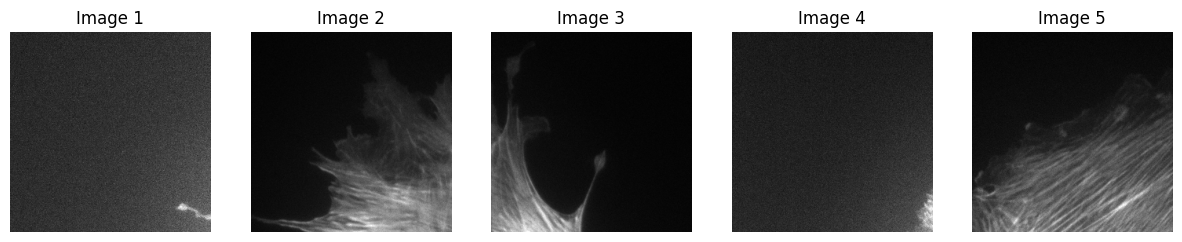

In [49]:
import matplotlib.pyplot as plt
print("Shape of clean_test_images:", clean_test_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of clean_train_images: (41520, 256, 256)


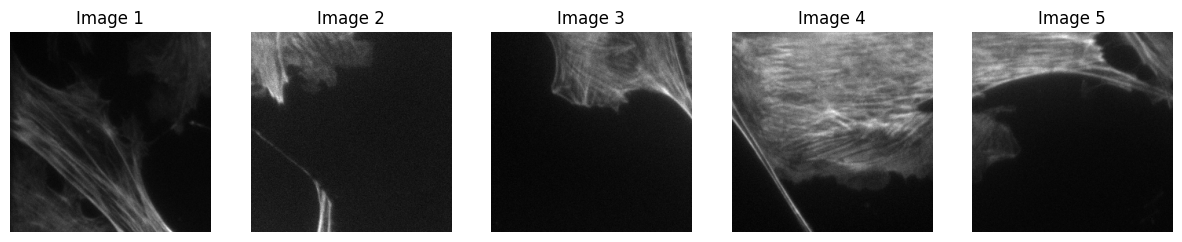

In [50]:
clean_train_images = np.load('/kaggle/input/denoising-data/clean_train.npy')

print("Shape of clean_train_images:", clean_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_test_images: (5200, 256, 256)


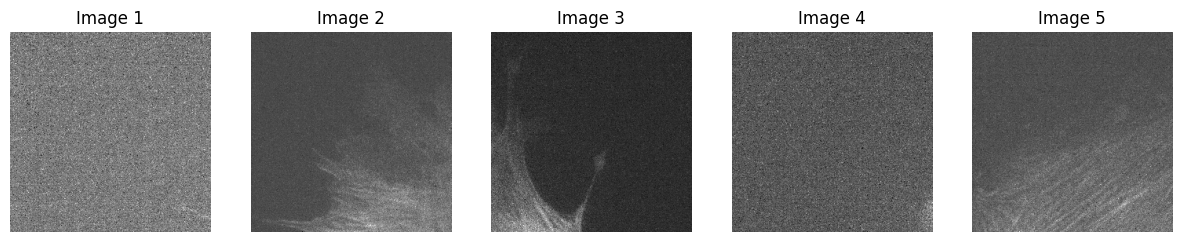

In [53]:
noise_test_images = np.load('/kaggle/input/denoising-data/noise_test.npy')


print("Shape of noise_test_images:", noise_test_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_train_images: (41520, 256, 256)


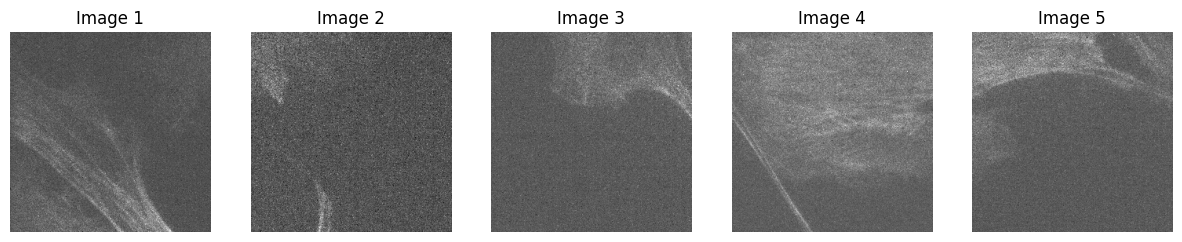

In [55]:
noise_train_images = np.load('/kaggle/input/denoising-data/noise_train.npy')


print("Shape of noise_train_images:", noise_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

In [60]:
noisy_image = noise_train_images[0]
clean_image = clean_train_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_image, clean_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)

SSIM between the first noisy and clean image: 0.49163567194733687


In [61]:
noisy_test_image = noise_test_images[0]
clean_test_image = clean_test_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_test_image, clean_test_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)



SSIM between the first noisy and clean image: 0.4396179090453914


In [66]:


def calculate_psnr(image1, image2):
    return psnr(image1, image2)

psnr_value = calculate_psnr(noisy_test_image, clean_test_image)
print(f"PSNR: {psnr_value}")


PSNR: 63.87954900769469


In [67]:
psnr_train = [calculate_psnr(clean, noise) for clean, noise in zip(clean_train_images, noise_train_images)]
psnr_test = [calculate_psnr(clean, noise) for clean, noise in zip(clean_test_images, noise_test_images)]



In [73]:
mean_psnr_train = np.mean(psnr_train)
variance_psnr_train = np.var(psnr_train)
std_psnr_train = np.std(psnr_train)
median_psnr_train = np.median(psnr_train)

mean_psnr_test = np.mean(psnr_test)
variance_psnr_test = np.var(psnr_test)
std_psnr_test = np.std(psnr_test)
median_psnr_test = np.median(psnr_test)


In [74]:
print(f"Train PSNR - Mean: {mean_psnr_train}, Variance: {variance_psnr_train}, Std: {std_psnr_train}, median: {median_psnr_train}")
print(f"Test PSNR - Mean: {mean_psnr_test}, Variance: {variance_psnr_test}, Std: {std_psnr_test},median: {median_psnr_test}")


Train PSNR - Mean: 54.59104488374475, Variance: 266.9385962004368, Std: 16.33825560457532, median: 53.00437461993658
Test PSNR - Mean: 55.608489459657484, Variance: 255.5910941200347, Std: 15.987216584510097,median: 55.105232727743285


#  4) Running sample inferences on the given pre trained model 
****

Importing all the necessary libraries

In [1]:
import math
import torch
from torch import nn
import numpy as np 
import matplotlib as plt
from tqdm import tqdm
from skimage.metrics import peak_signal_noise_ratio, structural_similarity



In [2]:
# Loading the data
noise_test_images = np.load('/kaggle/input/denoising-data/noise_test.npy')

# Converting the data to PyTorch tensors
noise_test_tensor = torch.from_numpy(noise_test_images.astype(np.float32))

noise_test_images = np.load('/kaggle/input/denoising-data/clean_test.npy')



In [34]:
# Adding an extra dimension to represent the color channel (grey over here)
noise_test_tensor = noise_test_tensor.unsqueeze(1)

In [32]:
noise_test_tensor = noise_test_tensor.squeeze(1)

In [35]:
noise_test_tensor.shape

torch.Size([5200, 1, 256, 256])

In [36]:
# Moving tensors to the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
noise_test_tensor = noise_test_tensor.to(device)




Loading all the required data and converting them to tensors so we can use them for ML model inferences quicker computations

In [37]:
print(noise_test_images.shape)

(5200, 256, 256)


In [12]:
print(noise_train_images.shape)

NameError: name 'noise_train_images' is not defined

Define the architercture of the RatUNet model 

In [38]:
class RatUNet(nn.Module):
    def __init__(self, block, num_features=64):
        super(RatUNet, self).__init__()  # Call the constructor of the parent class (nn.Module) to initialize the base class
        self.inplanes = num_features  # Set the initial number of feature planes to num_features (default is 64)
        
        self.conv = nn.Conv2d(1, num_features, kernel_size=3, stride=1, padding=1, bias=True)  # Define the initial 2D convolution layer with 1 input channel, num_features output channels, 3x3 kernel size, stride 1, and padding 1

        self.layer1 = self._make_layer(block, 64, 128, 3, stride=2)  # Call the _make_layer function to create the first layer with 64 input channels, 128 output channels, 3 blocks, and stride 2
        self.layer2 = self._make_layer(block, 128, 256, 3, stride=2)  # Call the _make_layer function to create the second layer with 128 input channels, 256 output channels, 3 blocks, and stride 2

        self.deconv1 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)  # Define the first transposed 2D convolution (deconvolution) layer with 512 input channels, 256 output channels, 3x3 kernel size, stride 2, padding 1, output padding 1, and no bias
        self.layer3 = self._make_layer(block, 256, 512, 4, stride=2)  # Call the _make_layer function to create the third layer with 256 input channels, 512 output channels, 4 blocks, and stride 2
        self.deconv2 = nn.ConvTranspose2d(512, 128, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)  # Define the second deconvolution layer with 512 input channels, 128 output channels, 3x3 kernel size, stride 2, padding 1, output padding 1, and no bias
        self.deconv3 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1, bias=False)  # Define the third deconvolution layer with 256 input channels, 128 output channels, 3x3 kernel size, stride 2, padding 1, output padding 1, and no bias

        self.layer4 = self._make_layer(block, 256, 256, 3)  # Call the _make_layer function to create the fourth layer with 256 input channels, 256 output channels, and 3 blocks
        self.layer5 = self._make_layer(block, 128, 128, 3)  # Call the _make_layer function to create the fifth layer with 128 input channels, 128 output channels, and 3 blocks
        self.layer6 = self._make_layer(block, 128, 128, 2)  # Call the _make_layer function to create the sixth layer with 128 input channels, 128 output channels, and 2 blocks
        self.conv2 = nn.Sequential(  # Define a sequence of convolutional layers
            nn.Conv2d(192, 128, kernel_size=3, stride=1, padding=1, bias=True),  # 2D convolution with 192 input channels, 128 output channels, 3x3 kernel size, stride 1, padding 1, and bias
            nn.PReLU(),  # Parametric Rectified Linear Unit (PReLU) activation function
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),  # 2D convolution with 128 input channels, 128 output channels, 3x3 kernel size, stride 1, padding 1, and bias
            nn.PReLU(),  # Parametric Rectified Linear Unit (PReLU) activation function
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True),  # 2D convolution with 128 input channels, 128 output channels, 3x3 kernel size, stride 1, padding 1, and bias
            nn.PReLU(),  # Parametric Rectified Linear Unit (PReLU) activation function
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, groups=128, bias=True),  # 2D depthwise convolution with 128 input channels, 128 output channels, 3x3 kernel size, stride 1, padding 1, and bias
            nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True),  # 2D convolution with 128 input channels, 128 output channels, 1x1 kernel size, stride 1, no padding, and bias
            nn.ReLU(inplace=True),  # Rectified Linear Unit (ReLU) activation function with inplace computation
        )
        self.ca = SequentialPolarizedSelfAttention(128)  # Define the channel attention module with 128 channels
        self.lastconv = nn.Conv2d(128, 1, kernel_size=3, stride=1, padding=1, bias=True)  # Define the final 2D convolution layer with 128 input channels, 1 output channel, 3x3 kernel size, stride 1, padding 1, and bias

        # Weight initialization
        for m in self.modules():  # Loop over all submodules
            if isinstance(m, nn.Conv2d):  # Check if the submodule is a 2D convolution layer
                n = m.kernel_size[0] * m.kernel_size[1] * m.out_channels  # Calculate the number of weights in the convolution layer
                m.weight.data.normal_(0.0, math.sqrt(1.0 / n))  # Initialize the weights with a normal distribution with mean 0 and standard deviation sqrt(1/n)
                m.bias.data.zero_()  # Initialize the bias with zeros

    def _make_layer(self, block, inplanes, planes, blocks, stride=1):
        layers = []
        downsample = None
        self.inplanes = inplanes
        if stride != 1:
            downsample = nn.Sequential(
                    nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=1, bias=True),
                    nn.AvgPool2d(kernel_size=2, stride=stride),
            )
#        if  stride == 1 and self.inplanes == 2*planes:
#            downsample = nn.Sequential(
#                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=1, bias=True),
#                #nn.BatchNorm2d(planes)
#            )
        
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        
        res = self.conv(x)

        res2 = self.layer1(res)
        res3 = self.layer2(res2)        
        out = self.layer3(res3)
        
        out = self.deconv1(out)               
        out = self.layer4(out)
        out = torch.cat((out, res3), dim=1) 

        out = self.deconv2(out)        
        out = self.layer5(out)
        out = torch.cat((out, res2), dim=1)
        
        out = self.deconv3(out)        
        out = self.layer6(out)
        out = torch.cat((out, res), dim=1)
        
        out = self.conv2(out)
        out = self.ca(out)
        out = self.lastconv(out)
        
        return x - out

class BasicBlock(nn.Module):
    expansion=1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(inplanes, planes, kernel_size=3, stride = stride, padding=1, bias=True)
        #self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.PReLU()#.LeakyReLU(0.2, inplace=True)# nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride = 1, padding=1, bias=True)
        #self.conv3 = nn.Conv2d(planes, planes, kernel_size=1, stride = 1, padding=0, bias=True)

        self.downsample = downsample
        #self.stride = stride

    def forward(self, x):
        residual = x

        out = self.conv1(x)
        #out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)        
        
        if self.downsample is not None:
            residual = self.downsample(x)

        out += residual      
        out = self.relu(out)

        return out

class ChannelAttention(nn.Module):
    def __init__(self, in_planes, ratio=16):
        super(ChannelAttention, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
           
        self.fc = nn.Sequential(nn.Conv2d(in_planes, in_planes // 16, 1, bias=True),
                               nn.ReLU(),
                               nn.Conv2d(in_planes // 16, in_planes, 1, bias=True))
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        out = avg_out + max_out
        return self.sigmoid(out)

class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super(SpatialAttention, self).__init__()

        self.conv1 = nn.Conv2d(2, 1, kernel_size, padding=kernel_size//2, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        x = self.conv1(x)
        return self.sigmoid(x)
    
class SequentialPolarizedSelfAttention(nn.Module):

    def __init__(self, channel=512):
        super().__init__()
        self.ch_wv=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.ch_wq=nn.Conv2d(channel,1,kernel_size=(1,1))
        self.softmax_channel=nn.Softmax(1)
        self.softmax_spatial=nn.Softmax(-1)
        self.ch_wz=nn.Conv2d(channel//2,channel,kernel_size=(1,1))
        self.ln=nn.LayerNorm(channel)
        self.sigmoid=nn.Sigmoid()
        self.sp_wv=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.sp_wq=nn.Conv2d(channel,channel//2,kernel_size=(1,1))
        self.agp=nn.AdaptiveAvgPool2d((1,1))

    def forward(self, x):
        b, c, h, w = x.size()

        #Channel-only Self-Attention
        channel_wv=self.ch_wv(x) #bs,c//2,h,w
        channel_wq=self.ch_wq(x) #bs,1,h,w
        channel_wv=channel_wv.reshape(b,c//2,-1) #bs,c//2,h*w
        channel_wq=channel_wq.reshape(b,-1,1) #bs,h*w,1
        channel_wq=self.softmax_channel(channel_wq)
        channel_wz=torch.matmul(channel_wv,channel_wq).unsqueeze(-1) #bs,c//2,1,1
        channel_weight=self.sigmoid(self.ch_wz(channel_wz).reshape(b,c,1).permute(0,2,1)).permute(0,2,1).reshape(b,c,1,1) #bs,c,1,1self.ln(
        channel_out=channel_weight*x

        #Spatial-only Self-Attention
        spatial_wv=self.sp_wv(channel_out) #bs,c//2,h,w
        spatial_wq=self.sp_wq(channel_out) #bs,c//2,h,w
        spatial_wq=self.agp(spatial_wq) #bs,c//2,1,1
        spatial_wv=spatial_wv.reshape(b,c//2,-1) #bs,c//2,h*w
        spatial_wq=spatial_wq.permute(0,2,3,1).reshape(b,1,c//2) #bs,1,c//2
        spatial_wq=self.softmax_spatial(spatial_wq)
        spatial_wz=torch.matmul(spatial_wq,spatial_wv) #bs,1,h*w
        spatial_weight=self.sigmoid(spatial_wz.reshape(b,1,h,w)) #bs,1,h,w
        spatial_out=spatial_weight*channel_out
        return spatial_out

In [14]:
torch.cuda.get_device_name(torch.cuda.current_device())

'Tesla T4'

In [39]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('/kaggle/input/model_epoch_100.pth/pytorch/version1/1/model_epoch_100.pth', map_location=device)


In [40]:
def process_in_batches(model, data_tensor, batch_size=64):
    model.eval()  # Ensure the model is in evaluation mode
    denoised_images = []
    num_batches = int(np.ceil(data_tensor.size(0) / batch_size))
    print(f"Processing {num_batches} batches...")
    
    with torch.no_grad():  # Disables gradient calculation
        for i in tqdm(range(num_batches), desc="Denoising"):
            batch_start = i * batch_size
            batch_end = min((i + 1) * batch_size, data_tensor.size(0))
            batch = data_tensor[batch_start:batch_end].to(device, non_blocking=True)  # Move batch to GPU
            
            # Reshape the batch to have a single channel and the correct spatial dimensions
            batch = batch.view(batch.size(0), 1, batch.size(2), batch.size(2))
            
            print(f"Batch {i+1}: Device - {batch.device}, Size - {batch.size()}")
            denoised_batch = model(batch)
            denoised_images.append(denoised_batch.detach().cpu().numpy())  # Move results back to CPU
            torch.cuda.empty_cache()  # Clear unused memory after processing each batch
    
    return np.concatenate(denoised_images, axis=0)

# Processing the training and test data
denoised_test_images = process_in_batches(model, noise_test_tensor, batch_size=64)

# Saving the denoised images as .npy files
np.save('/kaggle/working/denoised_test_images.npy', denoised_test_images)



Processing 82 batches...


Denoising:   0%|          | 0/82 [00:00<?, ?it/s]

Batch 1: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   1%|          | 1/82 [00:04<06:13,  4.61s/it]

Batch 2: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   2%|▏         | 2/82 [00:06<04:12,  3.16s/it]

Batch 3: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   4%|▎         | 3/82 [00:08<03:32,  2.69s/it]

Batch 4: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   5%|▍         | 4/82 [00:11<03:12,  2.46s/it]

Batch 5: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   6%|▌         | 5/82 [00:13<02:59,  2.33s/it]

Batch 6: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   7%|▋         | 6/82 [00:15<02:51,  2.25s/it]

Batch 7: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:   9%|▊         | 7/82 [00:17<02:45,  2.21s/it]

Batch 8: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  10%|▉         | 8/82 [00:19<02:41,  2.18s/it]

Batch 9: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  11%|█         | 9/82 [00:21<02:37,  2.16s/it]

Batch 10: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  12%|█▏        | 10/82 [00:23<02:34,  2.15s/it]

Batch 11: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  13%|█▎        | 11/82 [00:25<02:32,  2.14s/it]

Batch 12: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  15%|█▍        | 12/82 [00:27<02:29,  2.14s/it]

Batch 13: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  16%|█▌        | 13/82 [00:30<02:27,  2.14s/it]

Batch 14: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  17%|█▋        | 14/82 [00:32<02:25,  2.13s/it]

Batch 15: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  18%|█▊        | 15/82 [00:34<02:23,  2.14s/it]

Batch 16: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  20%|█▉        | 16/82 [00:36<02:21,  2.15s/it]

Batch 17: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  21%|██        | 17/82 [00:38<02:19,  2.15s/it]

Batch 18: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  22%|██▏       | 18/82 [00:40<02:18,  2.16s/it]

Batch 19: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  23%|██▎       | 19/82 [00:43<02:16,  2.17s/it]

Batch 20: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  24%|██▍       | 20/82 [00:45<02:14,  2.17s/it]

Batch 21: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  26%|██▌       | 21/82 [00:47<02:11,  2.15s/it]

Batch 22: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  27%|██▋       | 22/82 [00:49<02:09,  2.16s/it]

Batch 23: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  28%|██▊       | 23/82 [00:51<02:08,  2.17s/it]

Batch 24: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  29%|██▉       | 24/82 [00:53<02:06,  2.17s/it]

Batch 25: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  30%|███       | 25/82 [00:56<02:04,  2.18s/it]

Batch 26: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  32%|███▏      | 26/82 [00:58<02:02,  2.19s/it]

Batch 27: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  33%|███▎      | 27/82 [01:00<02:00,  2.19s/it]

Batch 28: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  34%|███▍      | 28/82 [01:02<01:58,  2.20s/it]

Batch 29: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  35%|███▌      | 29/82 [01:04<01:56,  2.20s/it]

Batch 30: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  37%|███▋      | 30/82 [01:07<01:54,  2.21s/it]

Batch 31: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  38%|███▊      | 31/82 [01:09<01:52,  2.21s/it]

Batch 32: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  39%|███▉      | 32/82 [01:11<01:50,  2.21s/it]

Batch 33: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  40%|████      | 33/82 [01:13<01:49,  2.23s/it]

Batch 34: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  41%|████▏     | 34/82 [01:16<01:47,  2.23s/it]

Batch 35: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  43%|████▎     | 35/82 [01:18<01:45,  2.25s/it]

Batch 36: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  44%|████▍     | 36/82 [01:20<01:43,  2.26s/it]

Batch 37: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  45%|████▌     | 37/82 [01:22<01:42,  2.27s/it]

Batch 38: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  46%|████▋     | 38/82 [01:25<01:40,  2.28s/it]

Batch 39: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  48%|████▊     | 39/82 [01:27<01:37,  2.27s/it]

Batch 40: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  49%|████▉     | 40/82 [01:29<01:36,  2.29s/it]

Batch 41: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  50%|█████     | 41/82 [01:32<01:34,  2.30s/it]

Batch 42: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  51%|█████     | 42/82 [01:34<01:32,  2.32s/it]

Batch 43: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  52%|█████▏    | 43/82 [01:36<01:30,  2.32s/it]

Batch 44: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  54%|█████▎    | 44/82 [01:39<01:28,  2.33s/it]

Batch 45: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  55%|█████▍    | 45/82 [01:41<01:26,  2.34s/it]

Batch 46: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  56%|█████▌    | 46/82 [01:43<01:23,  2.32s/it]

Batch 47: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  57%|█████▋    | 47/82 [01:46<01:22,  2.35s/it]

Batch 48: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  59%|█████▊    | 48/82 [01:48<01:20,  2.37s/it]

Batch 49: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  60%|█████▉    | 49/82 [01:51<01:19,  2.40s/it]

Batch 50: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  61%|██████    | 50/82 [01:53<01:16,  2.41s/it]

Batch 51: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  62%|██████▏   | 51/82 [01:55<01:14,  2.41s/it]

Batch 52: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  63%|██████▎   | 52/82 [01:58<01:12,  2.41s/it]

Batch 53: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  65%|██████▍   | 53/82 [02:00<01:09,  2.40s/it]

Batch 54: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  66%|██████▌   | 54/82 [02:03<01:06,  2.39s/it]

Batch 55: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  67%|██████▋   | 55/82 [02:05<01:04,  2.38s/it]

Batch 56: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  68%|██████▊   | 56/82 [02:07<01:01,  2.37s/it]

Batch 57: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  70%|██████▉   | 57/82 [02:10<00:59,  2.36s/it]

Batch 58: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  71%|███████   | 58/82 [02:12<00:55,  2.33s/it]

Batch 59: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  72%|███████▏  | 59/82 [02:14<00:53,  2.34s/it]

Batch 60: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  73%|███████▎  | 60/82 [02:17<00:51,  2.32s/it]

Batch 61: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  74%|███████▍  | 61/82 [02:19<00:48,  2.33s/it]

Batch 62: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  76%|███████▌  | 62/82 [02:21<00:46,  2.32s/it]

Batch 63: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  77%|███████▋  | 63/82 [02:24<00:43,  2.31s/it]

Batch 64: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  78%|███████▊  | 64/82 [02:26<00:41,  2.30s/it]

Batch 65: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  79%|███████▉  | 65/82 [02:28<00:39,  2.29s/it]

Batch 66: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  80%|████████  | 66/82 [02:30<00:36,  2.29s/it]

Batch 67: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  82%|████████▏ | 67/82 [02:33<00:34,  2.28s/it]

Batch 68: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  83%|████████▎ | 68/82 [02:35<00:32,  2.29s/it]

Batch 69: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  84%|████████▍ | 69/82 [02:37<00:29,  2.29s/it]

Batch 70: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  85%|████████▌ | 70/82 [02:39<00:27,  2.29s/it]

Batch 71: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  87%|████████▋ | 71/82 [02:42<00:25,  2.29s/it]

Batch 72: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  88%|████████▊ | 72/82 [02:44<00:22,  2.29s/it]

Batch 73: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  89%|████████▉ | 73/82 [02:46<00:20,  2.29s/it]

Batch 74: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  90%|█████████ | 74/82 [02:49<00:18,  2.30s/it]

Batch 75: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  91%|█████████▏| 75/82 [02:51<00:16,  2.30s/it]

Batch 76: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  93%|█████████▎| 76/82 [02:53<00:13,  2.30s/it]

Batch 77: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  94%|█████████▍| 77/82 [02:56<00:11,  2.31s/it]

Batch 78: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  95%|█████████▌| 78/82 [02:58<00:09,  2.31s/it]

Batch 79: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  96%|█████████▋| 79/82 [03:00<00:06,  2.32s/it]

Batch 80: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  98%|█████████▊| 80/82 [03:03<00:04,  2.34s/it]

Batch 81: Device - cuda:0, Size - torch.Size([64, 1, 256, 256])


Denoising:  99%|█████████▉| 81/82 [03:05<00:02,  2.35s/it]

Batch 82: Device - cuda:0, Size - torch.Size([16, 1, 256, 256])


Denoising: 100%|██████████| 82/82 [03:06<00:00,  2.27s/it]


NameError: name 'kaggle' is not defined

In [41]:
print(noise_test_tensor.shape)

torch.Size([5200, 1, 256, 256])


In [42]:
denoised_test_images = np.load('/kaggle/working/denoised_test_images.npy')

In [43]:
#need to remove the colour channel 
denoised_test_images_modified = np.squeeze(denoised_test_images, axis=1)
print(denoised_test_images_modified.shape)

(5200, 256, 256)


In [44]:
print(denoised_test_images.shape)
print (clean_test_images.shape)

(5200, 1, 256, 256)


NameError: name 'clean_test_images' is not defined

In [45]:
# Loading the data
clean_test_images = np.load('/kaggle/input/denoising-data/clean_test.npy')




def calculate_metrics(denoised_images, clean_images):
    ssim_values = []
    psnr_values = []

    for denoised, clean in zip(denoised_images, clean_images):
        denoised = np.squeeze(denoised)
        clean = np.squeeze(clean)

        ssim = structural_similarity(denoised, clean, data_range=clean.max() - clean.min())
        psnr = peak_signal_noise_ratio(clean, denoised)

        ssim_values.append(ssim)
        psnr_values.append(psnr)

    return ssim_values, psnr_values

def main():
    ssim_values, psnr_values = calculate_metrics(denoised_test_images_modified, clean_test_images)

    print(f"Average SSIM: {np.mean(ssim_values):.4f}")
    print(f"SSIM Standard Deviation: {np.std(ssim_values):.4f}")
    print(f"SSIM Median: {np.median(ssim_values):.4f}")

    print(f"Average PSNR: {np.mean(psnr_values):.4f}")
    print(f"PSNR Standard Deviation: {np.std(psnr_values):.4f}")
    print(f"PSNR Median: {np.median(psnr_values):.4f}")

if __name__ == "__main__":
    main()


/tmp/ipykernel_34/2371344631.py:16: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr = peak_signal_noise_ratio(clean, denoised)


Average SSIM: 0.4746
SSIM Standard Deviation: 0.2623
SSIM Median: 0.4459
Average PSNR: 55.6101
PSNR Standard Deviation: 15.9889
PSNR Median: 55.1055


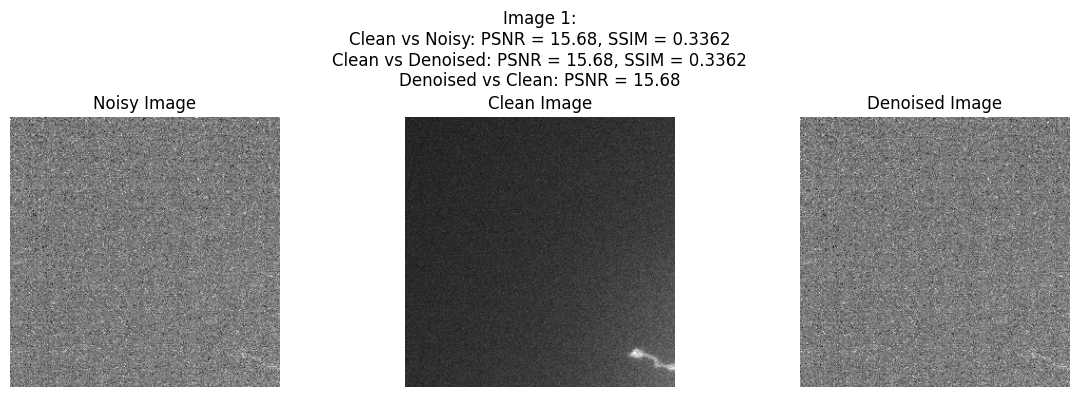

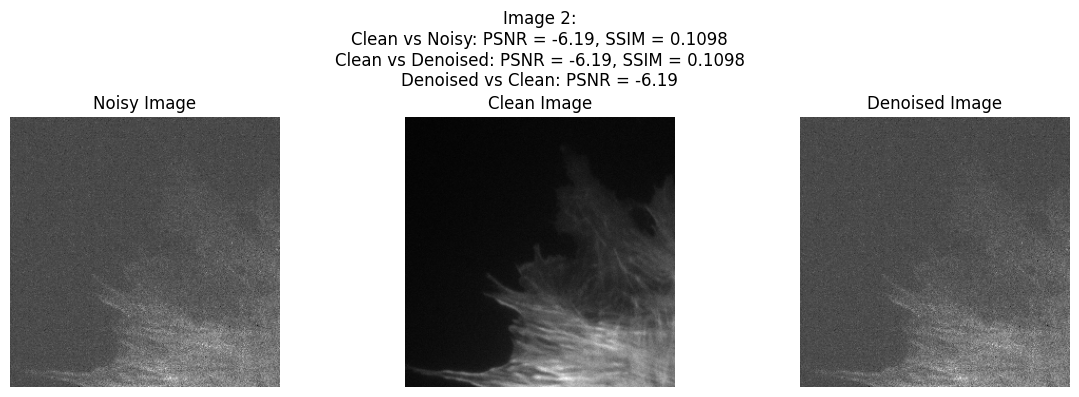

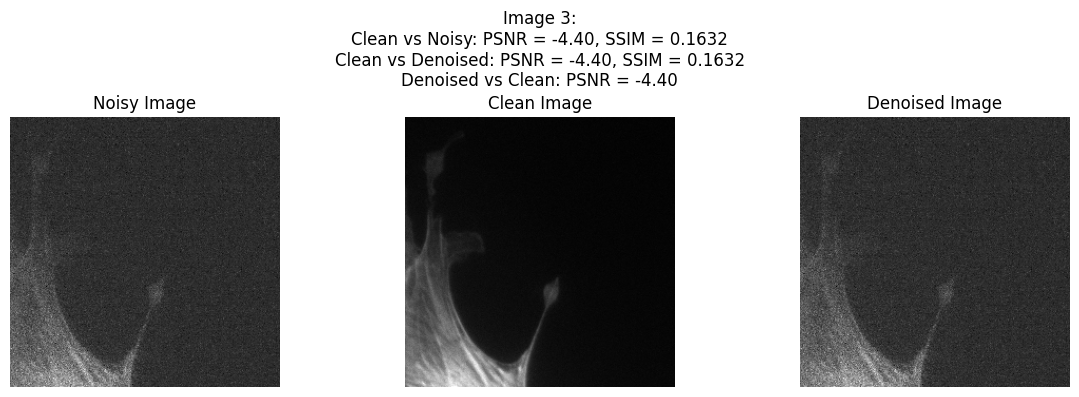

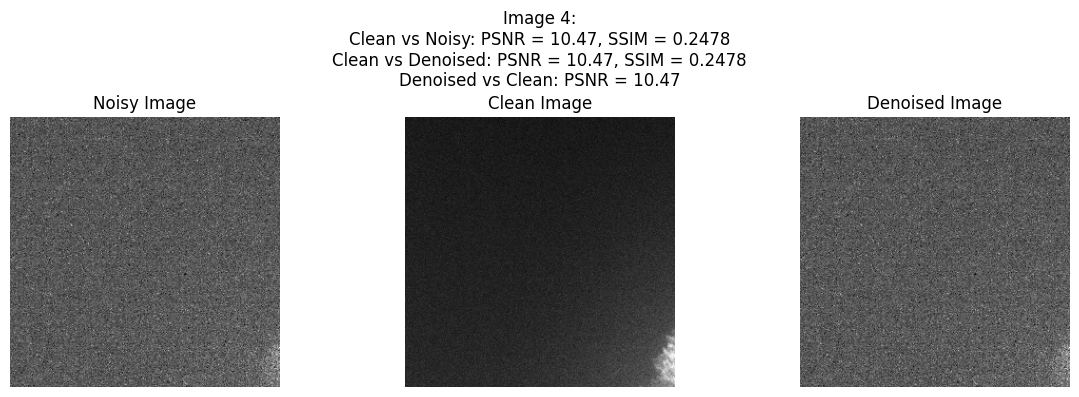

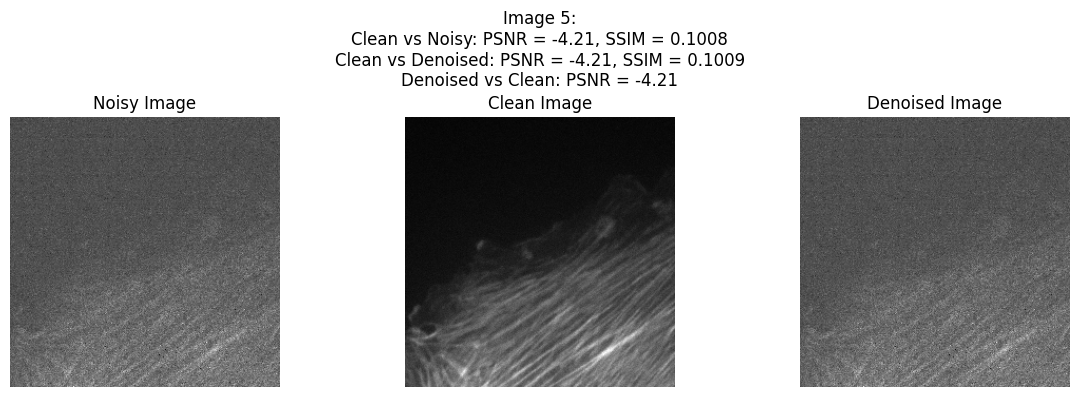

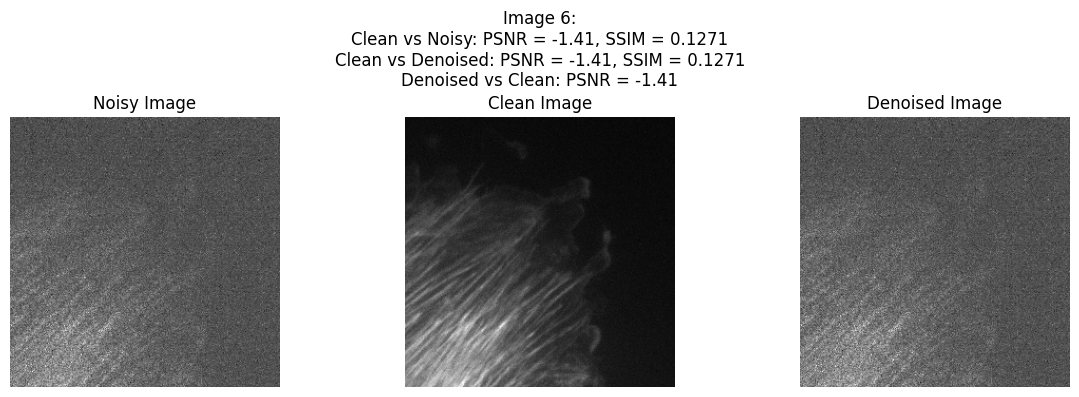

In [ ]:
def display_first_n_images(denoised_images, clean_images, noisy_images, num_images=10):
    for i in range(num_images):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
        
        ax1.imshow(noisy_images[i], cmap='gray')
        ax1.set_title("Noisy Image")
        ax1.axis('off')
        
        ax2.imshow(clean_images[i], cmap='gray')
        ax2.set_title("Clean Image")
        ax2.axis('off')
        
        ax3.imshow(denoised_images[i], cmap='gray')
        ax3.set_title("Denoised Image")
        ax3.axis('off')
        
        data_range = max(np.max(clean_images[i]), np.max(noisy_images[i]), np.max(denoised_images[i])) - min(np.min(clean_images[i]), np.min(noisy_images[i]), np.min(denoised_images[i]))
        
        ssim_clean_noisy = structural_similarity(clean_images[i], noisy_images[i], data_range=data_range)
        psnr_clean_noisy = peak_signal_noise_ratio(clean_images[i], noisy_images[i], data_range=data_range)
        
        ssim_clean_denoised = structural_similarity(clean_images[i], denoised_images[i], data_range=data_range)
        psnr_clean_denoised = peak_signal_noise_ratio(clean_images[i], denoised_images[i], data_range=data_range)
        
        psnr_denoised_clean = peak_signal_noise_ratio(denoised_images[i], clean_images[i], data_range=data_range)
        
        plt.suptitle(f"Image {i+1}:\n"
                     f"Clean vs Noisy: PSNR = {psnr_clean_noisy:.2f}, SSIM = {ssim_clean_noisy:.4f}\n"
                     f"Clean vs Denoised: PSNR = {psnr_clean_denoised:.2f}, SSIM = {ssim_clean_denoised:.4f}\n"
                     f"Denoised vs Clean: PSNR = {psnr_denoised_clean:.2f}")
        plt.tight_layout()
        plt.show()

def main():
    display_first_n_images(denoised_test_images_modified, clean_test_images, noise_test_images, num_images=10)

if __name__ == "__main__":
    main()